In [1]:
import numpy as np
import matplotlib.pyplot as plt
import jif
%matplotlib inline

/Users/schneider42/Envs/mbi/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
def myimshow(im):
    plt.imshow(im, origin='lower', interpolation='none', cmap=plt.cm.pink)
    plt.colorbar()

## Default image

In [3]:
gg = jif.GalSimGalaxyModel()

In [4]:
im = gg.get_image()
print im

galsim.Image(bounds=galsim.BoundsI(1,50,1,50), scale=0.2)


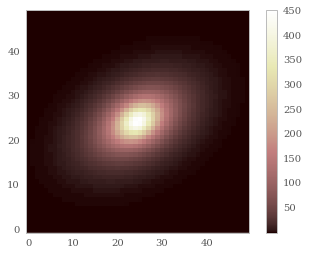

In [5]:
myimshow(im.array)

## Loading image from Roaster

In [6]:
config_file = "../config/roaster_defaults.cfg"
cfg = jif.RoasterModule.ConfigFileParser(config_file)
roaster, args = jif.RoasterModule.InitRoaster(cfg)

## resid_rms = save_model_image(args, roaster)
epoch_num = 0
model_image = roaster._get_model_image(iepochs=epoch_num)
dat = roaster.pixel_data[epoch_num]
mdat = model_image.array

infiles:
../data/TestData/test_image_data.h5
lam_over_diam: 0.01522 (arcseconds)
Have data for instruments: ['LSST']
pixel noise variances: [732.96000000000004]
PSF types: ['PSFModel class']
Active parameters:  ['e', 'beta']


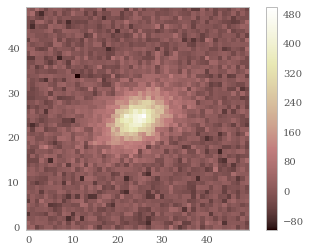

In [7]:
myimshow(dat)

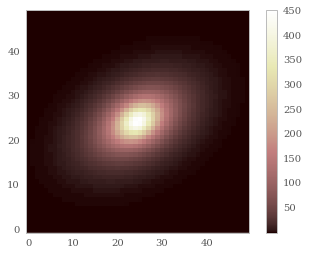

In [8]:
myimshow(mdat)

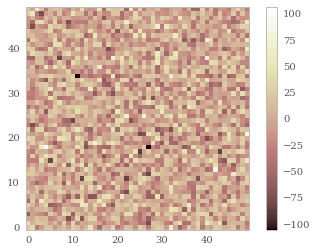

In [9]:
myimshow(dat - mdat)

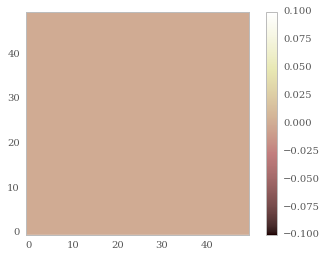

In [10]:
myimshow(im.array - mdat)

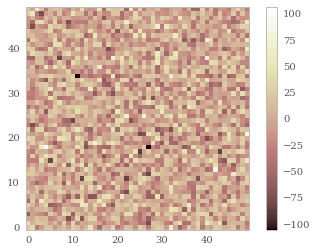

In [11]:
myimshow(dat - im.array)

In [24]:
resid = (dat - mdat)
print "{:12.10f}".format(np.sqrt(np.var(resid.ravel())))

27.6557006836


### Compare roaster GalSimGalaxyModel instance with the default instantiated above

In [12]:
ggr = roaster.src_models[0][0]

In [13]:
gg == ggr

False

In [14]:
for key, val in gg.__dict__.iteritems():
    print "{: <25}: {}".format(key, gg.__dict__[key] == ggr.__dict__[key])

n_psf_params             : True
paramnames               : True
pixel_scale_arcsec       : True
gsparams                 : True
psf_model_type           : True
n_params                 : True
active_parameters        : True
telescope_model          : True
paramtypes               : True
active_parameters_galaxy : True
galaxy_model             : True
params                   : [ True]
gain                     : True
filter_name              : True
psf_model                : False
psf_paramnames           : True


In [15]:
for key, val in gg.psf_model.__dict__.iteritems():
    print "{: <25}: {}".format(key, gg.psf_model.__dict__[key] == ggr.psf_model.__dict__[key])

lam_over_diam            : True
telescope_name           : True
gsparams                 : True
active_parameters        : True
aberrated_optics         : True
SED_name                 : True
params                   : [ True]
achromatic               : True


In [16]:
print gg.psf_model.__dict__['lam_over_diam']
print ggr.psf_model.__dict__['lam_over_diam']

0.0152243071278
0.0152243071278


In [17]:
print gg.psf_model.__dict__['gsparams']
print ggr.psf_model.__dict__['gsparams']

galsim.GSParams(16,4096,0.1,5.0,0.2,0.1,0.1,1.0,0.0001,1e-06,1e-06,1e-08,0.1,0.81,32,0.0001)
galsim.GSParams(16,4096,0.1,5.0,0.2,0.1,0.1,1.0,0.0001,1e-06,1e-06,1e-08,0.1,0.81,32,0.0001)


In [18]:
p = gg.psf_model
pr = ggr.psf_model

In [19]:
p.__dict__

{'SED_name': 'NGC_0695_spec',
 'aberrated_optics': False,
 'achromatic': True,
 'active_parameters': [],
 'gsparams': galsim.GSParams(16,4096,0.1,5.0,0.2,0.1,0.1,1.0,0.0001,1e-06,1e-06,1e-08,0.1,0.81,32,0.0001),
 'lam_over_diam': 0.015224307127761875,
 'params': rec.array([(0.8, 0.01, 0.4, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)], 
           dtype=[('psf_fwhm', '<f8'), ('psf_e', '<f8'), ('psf_beta', '<f8'), ('psf_mag', '<f8'), ('psf_dx', '<f8'), ('psf_dy', '<f8'), ('psf_aber_defocus', '<f8'), ('psf_aber_astig1', '<f8'), ('psf_aber_astig2', '<f8'), ('psf_aber_coma1', '<f8'), ('psf_aber_coma2', '<f8'), ('psf_aber_trefoil1', '<f8'), ('psf_aber_trefoil2', '<f8'), ('psf_aber_spher', '<f8')]),
 'telescope_name': 'LSST'}

In [20]:
pr.__dict__

{'SED_name': 'NGC_0695_spec',
 'aberrated_optics': False,
 'achromatic': True,
 'active_parameters': [],
 'gsparams': galsim.GSParams(16,4096,0.1,5.0,0.2,0.1,0.1,1.0,0.0001,1e-06,1e-06,1e-08,0.1,0.81,32,0.0001),
 'lam_over_diam': 0.015224307127761875,
 'params': rec.array([(0.8, 0.01, 0.4, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)], 
           dtype=[('psf_fwhm', '<f8'), ('psf_e', '<f8'), ('psf_beta', '<f8'), ('psf_mag', '<f8'), ('psf_dx', '<f8'), ('psf_dy', '<f8'), ('psf_aber_defocus', '<f8'), ('psf_aber_astig1', '<f8'), ('psf_aber_astig2', '<f8'), ('psf_aber_coma1', '<f8'), ('psf_aber_coma2', '<f8'), ('psf_aber_trefoil1', '<f8'), ('psf_aber_trefoil2', '<f8'), ('psf_aber_spher', '<f8')]),
 'telescope_name': 'LSST'}

In [21]:
gg.__dict__

{'active_parameters': ['e', 'beta'],
 'active_parameters_galaxy': ['e', 'beta'],
 'filter_name': 'r',
 'gain': 1.0,
 'galaxy_model': 'Spergel',
 'gsparams': galsim.GSParams(16,4096,0.1,5.0,0.2,0.1,0.1,1.0,0.0001,1e-06,1e-06,1e-08,0.1,0.81,32,0.0001),
 'n_params': 2,
 'n_psf_params': 0,
 'paramnames': ['e', 'beta'],
 'params': rec.array([(1.0, 0.3, 1.0, 0.26, 0.5236, 28.5, 99.0, 99.0, 99.0, 0.0, 0.0)], 
           dtype=[('redshift', '<f8'), ('nu', '<f8'), ('hlr', '<f8'), ('e', '<f8'), ('beta', '<f8'), ('mag_sed1', '<f8'), ('mag_sed2', '<f8'), ('mag_sed3', '<f8'), ('mag_sed4', '<f8'), ('dx', '<f8'), ('dy', '<f8')]),
 'paramtypes': [('redshift', '<f8'),
  ('nu', '<f8'),
  ('hlr', '<f8'),
  ('e', '<f8'),
  ('beta', '<f8'),
  ('mag_sed1', '<f8'),
  ('mag_sed2', '<f8'),
  ('mag_sed3', '<f8'),
  ('mag_sed4', '<f8'),
  ('dx', '<f8'),
  ('dy', '<f8')],
 'pixel_scale_arcsec': 0.2,
 'psf_model': <jif.psf_model.PSFModel at 0x11ac85e90>,
 'psf_model_type': 'PSFModel class',
 'psf_paramnames': [],


In [22]:
ggr.__dict__

{'active_parameters': ['e', 'beta'],
 'active_parameters_galaxy': ['e', 'beta'],
 'filter_name': u'r',
 'gain': 1.0,
 'galaxy_model': 'Spergel',
 'gsparams': galsim.GSParams(16,4096,0.1,5.0,0.2,0.1,0.1,1.0,0.0001,1e-06,1e-06,1e-08,0.1,0.81,32,0.0001),
 'n_params': 2,
 'n_psf_params': 0,
 'paramnames': ['e', 'beta'],
 'params': rec.array([(1.0, 0.3, 1.0, 0.26, 0.5236, 28.5, 99.0, 99.0, 99.0, 0.0, 0.0)], 
           dtype=[('redshift', '<f8'), ('nu', '<f8'), ('hlr', '<f8'), ('e', '<f8'), ('beta', '<f8'), ('mag_sed1', '<f8'), ('mag_sed2', '<f8'), ('mag_sed3', '<f8'), ('mag_sed4', '<f8'), ('dx', '<f8'), ('dy', '<f8')]),
 'paramtypes': [('redshift', '<f8'),
  ('nu', '<f8'),
  ('hlr', '<f8'),
  ('e', '<f8'),
  ('beta', '<f8'),
  ('mag_sed1', '<f8'),
  ('mag_sed2', '<f8'),
  ('mag_sed3', '<f8'),
  ('mag_sed4', '<f8'),
  ('dx', '<f8'),
  ('dy', '<f8')],
 'pixel_scale_arcsec': 0.2,
 'psf_model': <jif.psf_model.PSFModel at 0x110eacb50>,
 'psf_model_type': 'PSFModel class',
 'psf_paramnames': [],

In [23]:
mdat.shape

(50, 50)